### Plot the full impacts at Level 1a
including effects from improved capabilities via envelope improvements

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from dr_path.db import models, io
from dr_path import settings
from dr_path.plotting import plots
#%matplotlib notebook

In [2]:
region='CAMX'
dr_type='shift'
indir = "/mnt/sdb/bgerke_cache/bto_ee_dr_cache/dr_path_inputs_resstock_comstock_2016/"
outdir = "/mnt/sdb/bgerke_cache/bto_ee_dr_cache/plots_resstock_comstock_2016/"



In [16]:
#Mapping for WS to city name
city_tweak = {'Midland Midland':'Midland', 'Lubbock Lubbock':'Lubbock', 'Dallas Fort':'Dallas', 
              'Tyler Pounds':'Tyler', 'Wichita Falls Sheps':'Wichita Falls',
              'Angelina Co':'Lufkin',
              'Shreveport':'Shreveport, LA',  'Austin Mueller':'Austin', 
              'Victoria Victoria':'Victoria', 'San Angelo Mathis':'San Angelo',
              'Dallas Hensley Field Nas':'Dallas', 'Port Arthur Jeffers':'Port Arthur',
              'Mc Allen Miller':'McAllen', 'Dallas Fort Worth F':'Dallas',
              'Victoria Victoria R':'Victoria', 'C David Campbell Fld':'Corsicana',
              'Cox Fld':'Paris', 'Odessa Schlemeyer Fl':'Odessa',
              'Draughon Miller Cen':'Temple', 'Stephenville Clark':'Stephenville',
              'Easterwood Fld':'College Station', 'Sanderson Ramos':'Sanderson',
              'Kingsville Nas':'Kingsville', 'Fort Stockton Pecos':'Fort Stockton',
              'Beeville Chase Naas':'Beeville',
              
              
              'Barstow Daggett': 'Barstow', 'Bakersfield Meadows':'Bakersfield', 
              'Modesto City Co Har': 'Modesto', 'C M Schulz Sonoma Co':'Sonoma Co',
              'Blue Canyon Nyack': 'Blue Canyon', 'Mountain View Sunn':'Mountain View',
              'Truckee Tahoe': 'Truckee',
              'Fresno Air':'Fresno', 'Reno Cannon':'Reno, NV',
              'Sacramento Executiv': 'Sacramento', 'San Diego Lindbergh':'San Diego',
              'Modesto City Co Har': 'Modesto', 'Concord Buchanan':'Concord',
              'Santa Maria Public':'Santa Maria',
              
              'Hartford Bradley In': 'Hartford, CT', 
              'Worcester':'Worcester, MA',
              'Portland': 'Portland, ME',
              'Concord':'Concord, MA',
              'Laconia':'Laconia, NH',
              'Caribou':'Caribou, ME',
              'Laurence G Hanscom':'Concord, MA',
              'Lawrence':'Lawrence, MA',
              'Bangor':'Bangor, ME',
              'Hartford Brainard': 'Hartford, CT',
              'Barnes':'Westfield, MA',
              'Wiscasset':'Wiscasset, ME',
              'Norwood Mem':'Norwood, MA',
              'Meriden Markham':'Meriden, CT',
              'Jaffrey  Silver':'Jaffrey, NH',
              'Skyhaven':'Rochester, NH',
              'Greenville':'Greenville, ME',
              'Augusta State':'Augusta, ME',
              'Harriman And West':'North Adams, MA',
              'Morrisville Stowe St':'Morrisville, VT',
              'Pease':'Portsmouth, NH',
              'Eastern Slopes':'Fryeburg, ME',
              'Sanford':'Sanford, ME',
              'Mt Washington':'Mt. Washington, NH',
              'Hartness State':'Springfield, VT',
              'Orange':'Orange, MA',
              'Plymouth':'Plymouth, MA',
              'Newport':'Newport, RI',
              'Matinicus Rock':'Matinicus Rock, ME',
              'New Bedford':'New Bedford, MA',
              'Provincetown':'Provincetown, MA',
              'Edward F Knapp State':'Berlin, VT',
              'Marthas Vineyard':"Martha's Vineyard, MA",
              'Lebanon':'Lebanon, NH',
              'Houlton':'Houlton, ME',
              'Bridgeport Igor I': 'Bridgeport, CT',
              'Nantucket Mem':'Nantucket, MA',
              'Boston Logan': 'Boston, MA', 
              'Concord Municipal': 'Concord, NH', 
              'Burlington': 'Burlington, VT',
              'W H Morse State':'Bennington, VT',
              'Providence Green St': 'Providence, RI',
              'Albany County': 'Albany, NY'}


#Lists of cities to keep
if region == 'CAMX':
    cities=['Arcata', 'Bakersfield',  
            'Los Angeles', 'Sacramento', 'San Diego', 'San Francisco',  
            'Ukiah',
            'Barstow', 'Truckee', 'Siskiyou Co', 'Fresno','Reno, NV',]
elif region=='ERCT':
    cities = ['Abilene','Amarillo','Brownsville', 'El Paso', 
              'Dallas', 'Houston', 'Lufkin', 'Tyler', 'Laredo', 'Corpus Christi', 'Fort Stockton']
elif region=='NENG':
    cities = ['Hartford, CT', 'Providence, RI', 'Boston, MA', 'Bangor, ME',   'Concord, NH',
              'Albany, NY', 'Bridgeport, CT',
              'Burlington, VT',  'Portsmouth, NH', 'North Adams, MA', 'Westfield, MA', 
              'Springfield, VT', 'Caribou, ME', 'Portland, ME',]

upg_name_map = {'Baseline':'Baseline',
                'EquipmentOnly':'Equipment',
                'EnvelopeOnly':'Envelope',
                'EnvelopePlusControls':'Env.+Cont.',
                'ControlsOnly':'Controls',
                'EnvelopePlusControlsPlusEquipment':'All'}
    
region_mapping = {'CAMX': 'California', 
                  'ERCT': 'Texas',
                  'NENG': 'New England'}

test_year = 2016
test_year

2016

<AxesSubplot:ylabel='procurement_price'>

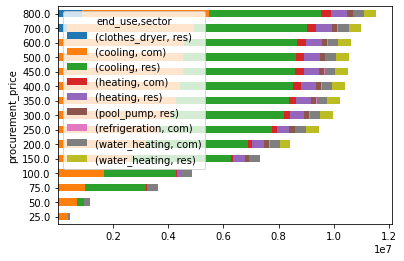

In [4]:
try:
    models.database.close()
except:
    pass


db_file = os.path.join(indir,region,'dr_path_{r}.db'.format(r=region))
models.database.init(db_file)
#db_file = os.path.join(indir,region,'dr_path_{r}_0.db'.format(r=region))
models.database.init(db_file)

models.database.connect()
dem = models.DemandScenario.get(id=1)
assert 'Baseline' in dem.name
tou = models.TOUImpactScenario.get(id=1)
ren = models.RenewableScenario.select().where(
    models.RenewableScenario.weather ==dem.weather)[0]
ts = models.TechnologyScenario.get(name='Base')



sup = io.get_supply_curve(dem, tou, ren, ts, year=2016, dr_type='shift', disaggregate_by=['end_use','sector'])
sup.plot.barh(stacked=True)

In [5]:

def extract_city(pw):
    
    cities = pw['cluster'].str.split('_').str[2].fillna(
        pw['cluster'].str.split('_').str[1].str.split('-').str[0]).str.split('.').str.join(' ')
    cities = cities.str.replace('Metr.*','').str.strip()
    cities = cities.str.replace('72.*','').str.strip()
    cities = cities.str.replace('Int.*','').str.strip()
    cities = cities.str.replace('Rgnl','').str.strip()
    cities = cities.str.replace('Reg.*','').str.strip()
    cities = cities.str.replace('Air.*','').str.strip()
    cities = cities.str.replace('Arpt','').str.strip()
    cities = cities.str.replace('Muni.*','').str.strip()
    pw['city'] = cities
    for c in city_tweak.keys():
        pw.loc[pw['city']==c,'city'] = city_tweak[c]
    
    
    return pw

def get_pws_and_resource(dem, tou, ren, ts, dr_type='shed', btype='Single-Family Detached'):
    pws = io.get_pathways_df_at_price(dem,tou,ren,ts, 800., 
                                      dr_type=dr_type, year=test_year, 
                                      cost_frame='gross', 
                                      extra_fields=[models.SiteInstallation.end_use_customer_count, 
                                                    models.SiteInstallation.cluster_customer_count,
                                                    models.SiteInstallation.dr_resource_kw_site,
                                                    models.SiteInstallation.building_type])
    assert (pws['dr_resource_kw_site'] == pws['dr_resource_kw_cluster'].div(pws['end_use_customer_count'])).all()
    
    #Compute resource for an AVERAGE site (including zeros)
    pws['dr_resource_kw_avg_site'] = pws['dr_resource_kw_cluster'].div(pws['cluster_customer_count'])
    #Extract city name
    pws = extract_city(pws)
    resource = pws.loc[pws['building_type']==btype].groupby(
        ['city', 'end_use'])['dr_resource_kw_avg_site'].max().reset_index().groupby(
        ['city'])['dr_resource_kw_avg_site'].sum()
    return pws, resource



In [6]:
btype='Single-Family Detached'
pw_base_shed, resource_base_shed = get_pws_and_resource(dem, tou, ren, ts, dr_type='shed', btype=btype)

pw_base_shed['city'].value_counts()

Los Angeles      57
Sacramento       54
San Francisco    50
Fresno           48
San Diego        46
Stockton         44
Modesto          44
Bakersfield      43
Sonoma Co        42
Watsonville      41
Salinas          40
Oxnard           40
Fullerton        39
Ontario          39
Blue Canyon      39
Nut Tree         38
San Luis Co      37
Lake Tahoe       35
Concord, MA      35
Redding          34
Santa Barbara    33
Ukiah            33
Oakland          32
Palm Springs     31
Yuba Co          26
Visalia          26
Hanford          26
Red Bluff        25
Madera           25
Mountain View    24
Truckee          24
Napa Co          21
Merced           20
Siskiyou Co      20
Bishop           19
Imperial Co      17
Reno, NV         15
Long Beach Lb    14
Santa Maria      12
Arcata           12
Oroville         12
Barstow          10
Alturas           9
Name: city, dtype: int64

In [7]:
clust = io.get_cluster_df(where=(models.Cluster.demand_scenario==dem))
clust.building_type.value_counts()

SmallOffice                      43
SmallHotel                       41
RetailStandalone                 40
FullServiceRestaurant            34
RetailStripmall                  34
Outpatient                       33
SecondarySchool                  32
MediumOffice                     30
LargeOffice                      28
Hospital                         24
QuickServiceRestaurant           21
PrimarySchool                    21
Warehouse                        21
LargeHotel                       19
Multi-Family with 5+ Units       11
Multi-Family with 2 - 4 Units    11
Mobile Home                      11
Single-Family Detached           11
Single-Family Attached            8
ind_other                         1
Name: building_type, dtype: int64

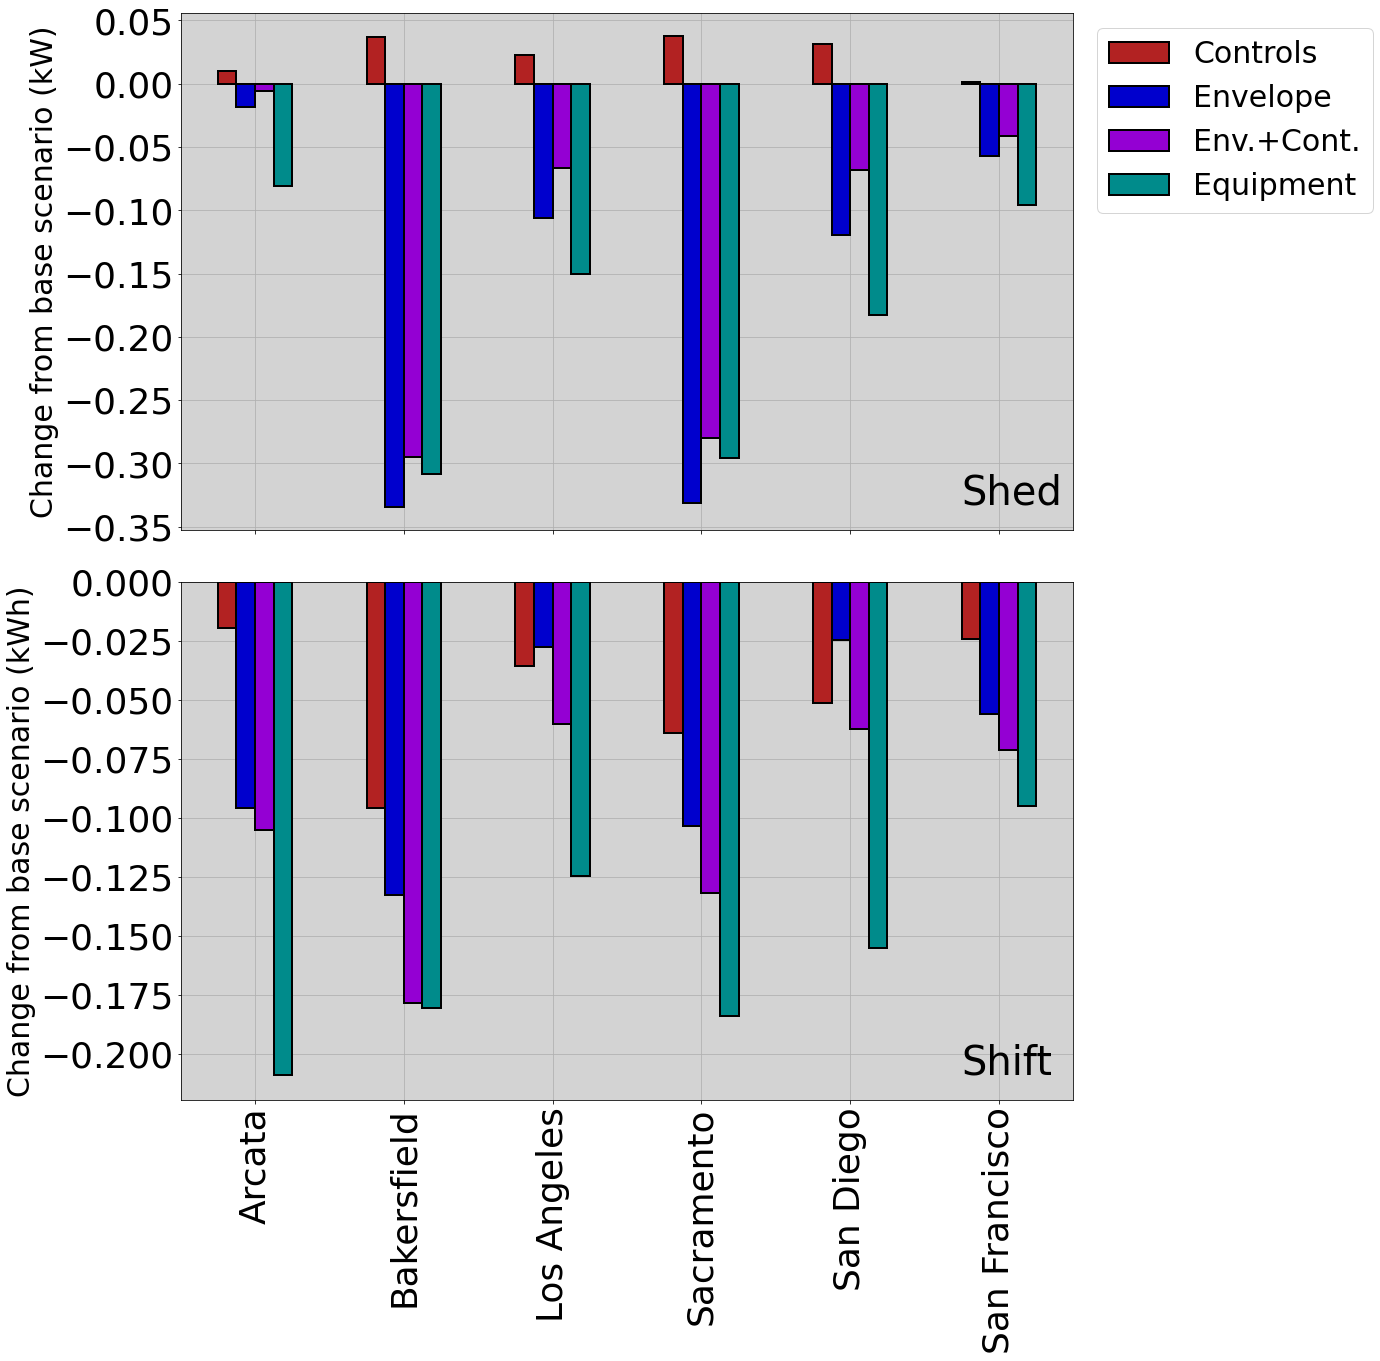

In [45]:

colors = ['firebrick', 'mediumblue', 'darkviolet', 'darkcyan']#, 'dimgray']

btype='Single-Family Detached'

def get_resource_deltas(dr_type='shed', btype='Single-Family Detached'):
    dem = models.DemandScenario.get(id=1)
    tou = models.TOUImpactScenario.get(id=1)
    ren = models.RenewableScenario.select().where(
            models.RenewableScenario.weather ==dem.weather)[0]
    ts = models.TechnologyScenario.get(name='Base')
    assert 'Baseline' in dem.name
    pw_base, resource_base = get_pws_and_resource(
        dem, tou, ren, ts, dr_type=dr_type, btype=btype)

    resource_deltas = pd.DataFrame()
    for u, dem in enumerate(models.DemandScenario.select()):

        name = dem.name.split('_')[1]
        if name=='Baseline':
            continue
        ren = models.RenewableScenario.select().where(
            models.RenewableScenario.weather ==dem.weather)[0]
        pw_upg, resource_upg = get_pws_and_resource(
            dem, tou, ren, ts, dr_type=dr_type, btype=btype)
        
        resource_deltas[name] = resource_upg.sub(resource_base)

    resource_deltas = resource_deltas.rename(
            index=city_tweak, columns=upg_name_map)
    
    return resource_deltas

def make_1a_plot(btype, writeto='', groups=7, title=True):
    
    resource_deltas_shed = get_resource_deltas('shed',btype)
    resource_deltas_shift = get_resource_deltas('shift',btype)
    
    #Create figure
    fig,axs = plt.subplots(2,1, figsize=[16,20], sharex=True)

    plot_cities = pd.Series(cities).loc[pd.Series(cities).isin(resource_deltas_shed.index.values)][0:groups]

    incl_cols = resource_deltas_shed.columns[~resource_deltas_shed.columns.str.contains('All')]
    ax=axs[0]
    ax=resource_deltas_shed[incl_cols].reindex(plot_cities).plot(kind='bar', 
                                                         edgecolor='k', color=colors,
                                                         linewidth=2, fontsize=36, grid=True,ax=ax, legend=False)
    ax.set_axisbelow(True)
    ax.set_facecolor("lightgray")
    ax.set_ylabel(
            "Change from base scenario (kW)", 
            fontsize=30)
    ax.set_xlabel('')
    ax.text(0.875,0.05,'Shed', transform=ax.transAxes, fontsize=40)

    ax=axs[1]

    ax = resource_deltas_shift[incl_cols].reindex(plot_cities).plot(kind='bar', edgecolor='k', color=colors,
                                               linewidth=2, fontsize=36, grid=True,ax=ax, legend=False)
    ax.set_axisbelow(True)
    ax.set_facecolor("lightgray")
    ax.set_ylabel(
            "Change from base scenario (kWh)", 
            fontsize=30)
    ax.set_xlabel('')
    ax.text(0.875,0.05,'Shift', transform=ax.transAxes, fontsize=40)

    if title: axs[0].set_title("{r}: {b}".format(r=region_mapping[region], b=btype), fontsize=36)
    axs[0].legend(loc='upper left', bbox_to_anchor=[1.01,1], fontsize=30)
    plt.subplots_adjust(hspace = 0.1)
    if writeto:
        
        plt.close()
        fig.savefig(writeto, bbox_inches='tight')
    
make_1a_plot(btype, groups=6, title=False)


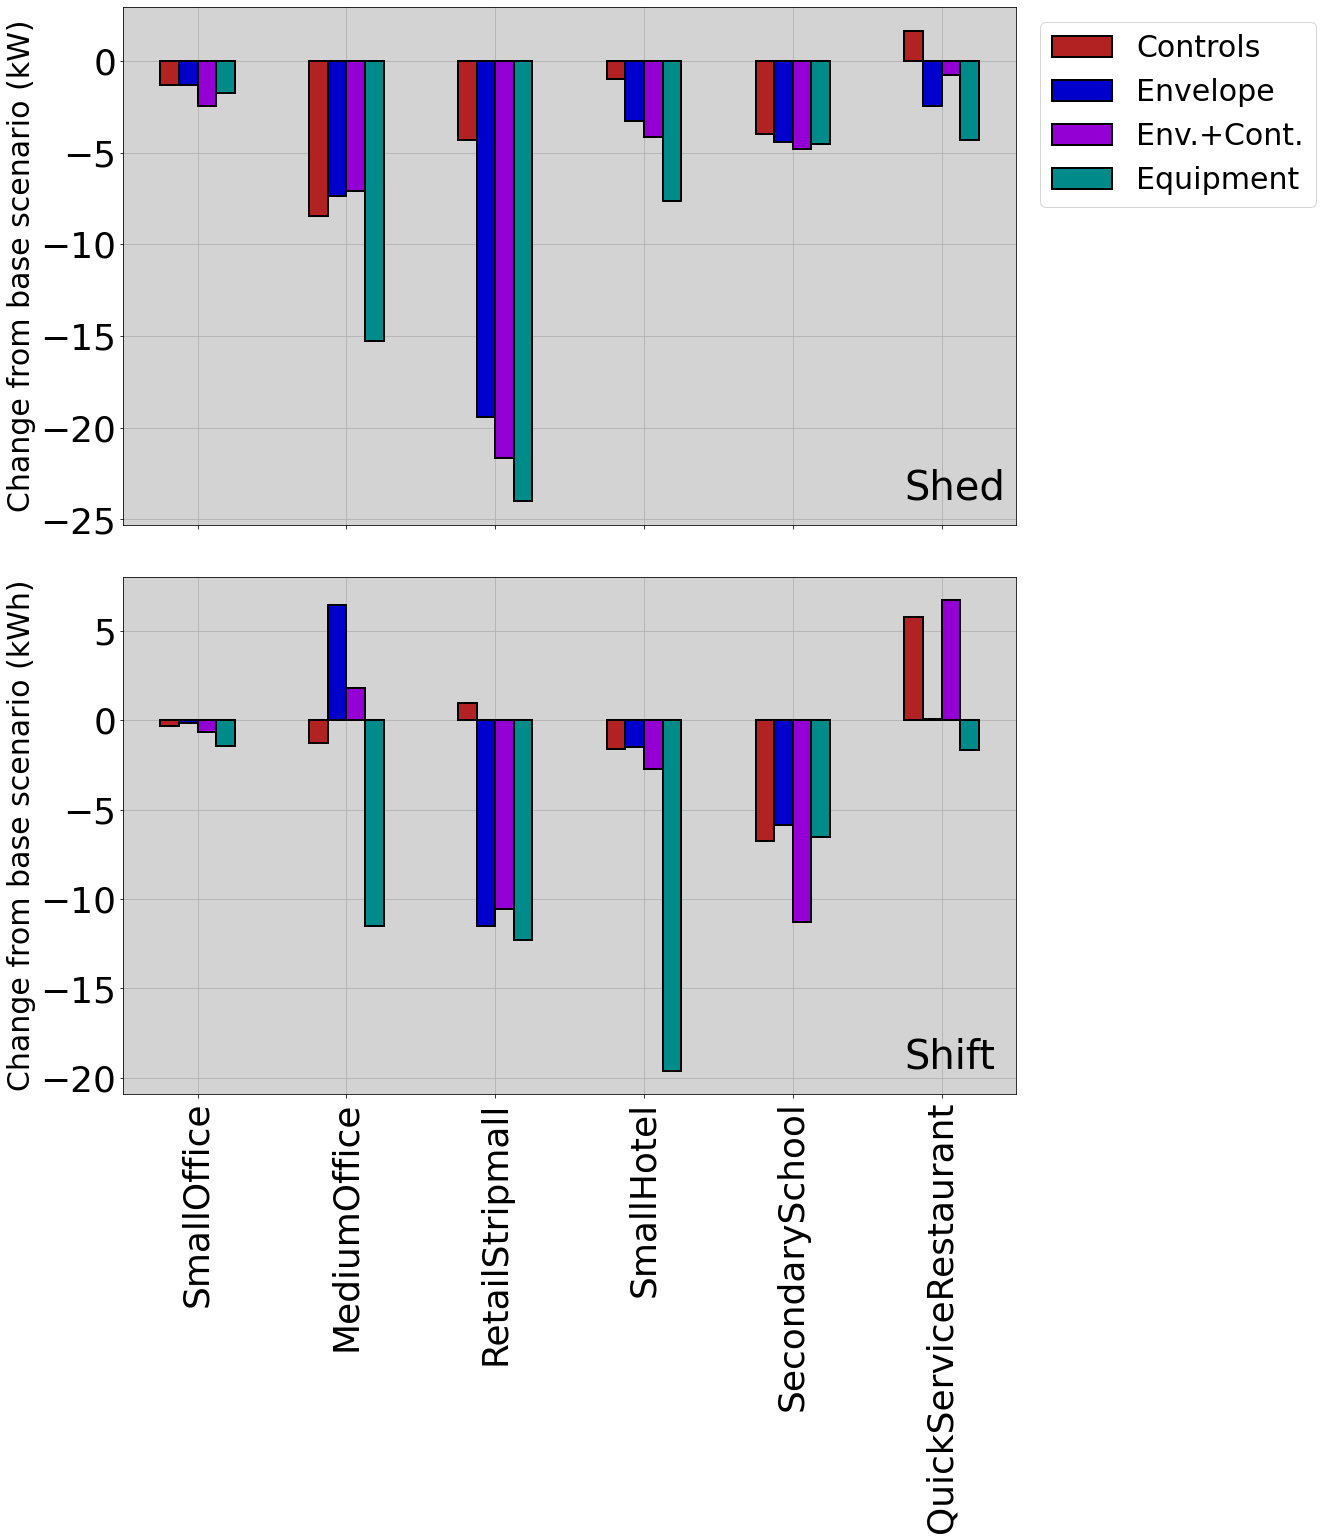

In [46]:
#SmallOffice                      43
#SmallHotel                       41
#RetailStandalone                 40
#FullServiceRestaurant            34
#RetailStripmall                  34
#Outpatient                       33
#SecondarySchool                  32
#MediumOffice                     30
#LargeOffice                      28
#Hospital                         24
#QuickServiceRestaurant           21
#PrimarySchool                    21
#Warehouse                        21
#LargeHotel                       19

city = 'Los Angeles'
btypes = ['SmallOffice', 'MediumOffice', 'RetailStripmall', 'SmallHotel', 'SecondarySchool',  'QuickServiceRestaurant']
plotdata_shed = pd.DataFrame()
plotdata_shift = pd.DataFrame()
for btype in btypes:
    rd_shed = get_resource_deltas(dr_type = 'shed', btype=btype)
    rd_shed = rd_shed[rd_shed.columns[~rd_shed.columns.str.contains('All')]]
    plotdata_shed[btype] = rd_shed.loc[city]
    rd_shift = get_resource_deltas(dr_type = 'shift', btype=btype)
    rd_shift = rd_shift[rd_shift.columns[~rd_shift.columns.str.contains('All')]]
    plotdata_shift[btype] = rd_shift.loc[city]
    
fig,axs = plt.subplots(2,1, figsize=[16,20], sharex=True)

ax=axs[0]
plotdata_shed.T.plot(kind='bar', 
                     edgecolor='k', color=colors,
                     linewidth=2, fontsize=36, grid=True,ax=ax, legend=False)
ax.set_axisbelow(True)
ax.set_facecolor("lightgray")
ax.set_ylabel(
        "Change from base scenario (kW)", 
        fontsize=30)
ax.set_xlabel('')
ax.text(0.875,0.05,'Shed', transform=ax.transAxes, fontsize=40)

ax=axs[1]
plotdata_shift.T.plot(kind='bar', 
                      edgecolor='k', color=colors,
                      linewidth=2, fontsize=36, grid=True,ax=ax, legend=False)
ax.set_axisbelow(True)
ax.set_facecolor("lightgray")
ax.set_ylabel(
        "Change from base scenario (kWh)", 
        fontsize=30)
ax.set_xlabel('')
ax.text(0.875,0.05,'Shift', transform=ax.transAxes, fontsize=40)


axs[0].legend(loc='upper left', bbox_to_anchor=[1.01,1], fontsize=30)
plt.subplots_adjust(hspace = 0.1)

In [16]:
for btype in clust.building_type.unique():
    if btype=='ind_other':
        continue
    print(btype)
    make_1a_plot(btype, writeto=os.path.join(outdir,'level1a_{b}_{r}.png'.format(b=btype.replace(' ','_'), r=region)))

Mobile Home
Multi-Family with 2 - 4 Units
Multi-Family with 5+ Units
Single-Family Detached
Single-Family Attached
FullServiceRestaurant
LargeHotel
LargeOffice
MediumOffice
Outpatient
PrimarySchool
RetailStandalone
RetailStripmall
SecondarySchool
SmallHotel
SmallOffice
Hospital
QuickServiceRestaurant


<AxesSubplot:ylabel='procurement_price'>

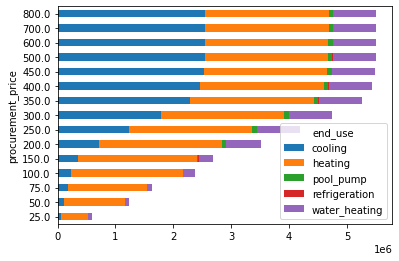

In [17]:
sup = io.get_supply_curve(dem, tou, ren, ts, year=2016, dr_type='shift', disaggregate_by='end_use')
sup.plot.barh(stacked=True)

In [ ]:
models.database.close()